<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/classification/List6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import files
# files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/secrets/kaggle.json' ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [89]:
!kaggle datasets download -d prathamtripathi/drug-classification
!kaggle datasets download -d uciml/pima-indians-diabetes-database

!mkdir dataset

!unzip -o -q /content/drug-classification.zip -d /content/dataset

!unzip -o -q /content/pima-indians-diabetes-database.zip -d /content/dataset

drug-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists


In [90]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB

In [91]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [92]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)
drug = pd.read_csv("/content/dataset/drug200.csv", sep=",", header=0)


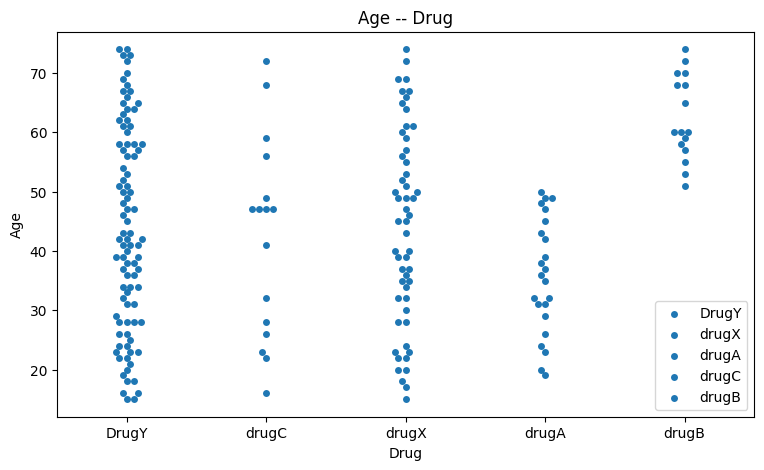

In [93]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = drug)
plt.legend(drug.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

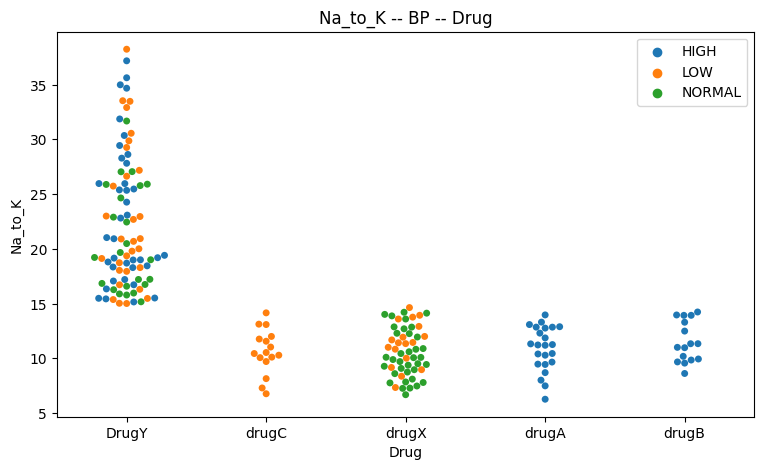

In [94]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = drug)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

In [95]:
drug = pd.read_csv("/content/dataset/drug200.csv", sep=",", header=0)

drug.rename(columns={
    'Age': 'age', 
    'Sex': 'sex', 
    'BP': 'pb', 
    'Cholesterol': 
    'cholesterol',
    'Na_to_K':'na_to_k_ratio', 
    'Drug': 'target'},
    inplace=True
    )

drug['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in drug.na_to_k_ratio]

drug_target = drug.target

drug.drop(['target'], axis=1, inplace=True)


In [96]:
target_label_encoder = LabelEncoder()

target_label_encoder.fit(drug_target)

drug_target_labels = target_label_encoder.classes_

print(drug_target_labels)

drug_target = target_label_encoder.transform(drug_target)


# print(drug.shape)
# temp = drug_target.reshape(-1, 1)
# sns.pairplot(drug, hue=temp.any())

['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [97]:
label_encoder = LabelEncoder()

drug['sex'] = label_encoder.fit_transform(drug['sex'])
drug['pb'] = label_encoder.fit_transform(drug['pb'])
drug['cholesterol'] = label_encoder.fit_transform(drug['cholesterol'])


In [98]:
lda_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('lda_dim_reduction', LDA(n_components=2)),
    ]
)

# Zad 1

## Iris

In [99]:
iris_lda = pd.DataFrame(data=lda_pipeline.fit_transform(iris.data, iris.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

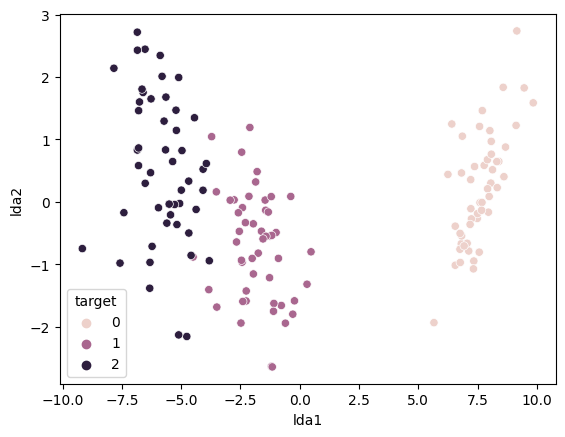

In [100]:
sns.scatterplot(data=iris_lda, x='lda1', y='lda2', hue=iris.target)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_lda, iris.target, test_size=0.33)

In [102]:
# param_grid = {'n_neighbors': np.arange(3, 6)}

# knn_cv = GridSearchCV(knn, param_grid, cv=5)

# knn_cv.fit(X_train, Y_train)

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

iris_knn_report = classification_report(Y_test, Y_predict)

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        24
           2       0.85      1.00      0.92        11

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        24
           2       0.85      1.00      0.92        11

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



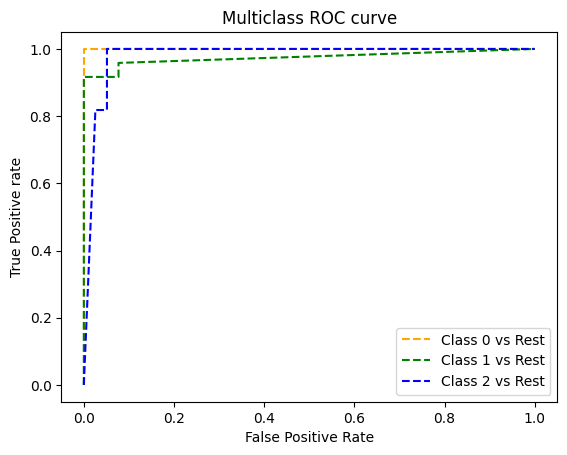

In [104]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))

knn_ovr.fit(X_train, Y_train)

Y_predict = knn_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [105]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

iris_svc_report = classification_report(Y_test, Y_predict)

Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.96      0.98        24
           2       0.92      1.00      0.96        11

    accuracy                           0.98        50
   macro avg       0.97      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.96      0.98        24
           2       0.92      1.00      0.96        11

    accuracy                           0.98        50
   macro avg       0.97      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50



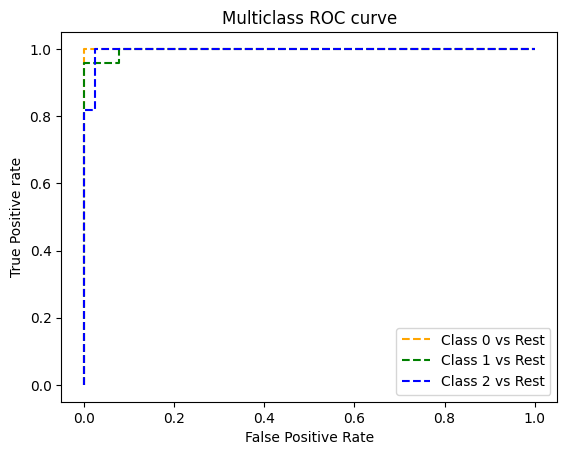

In [106]:
svc_ovr = OneVsRestClassifier(SVC(gamma='auto', probability=True))

svc_ovr.fit(X_train, Y_train)

Y_predict = svc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = svc_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [107]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

iris_dtc_report = classification_report(Y_test, Y_predict)

Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.96      0.96        24
           2       0.91      0.91      0.91        11

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.96      0.96        24
           2       0.91      0.91      0.91        11

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

(50, 3)
(50,)
50


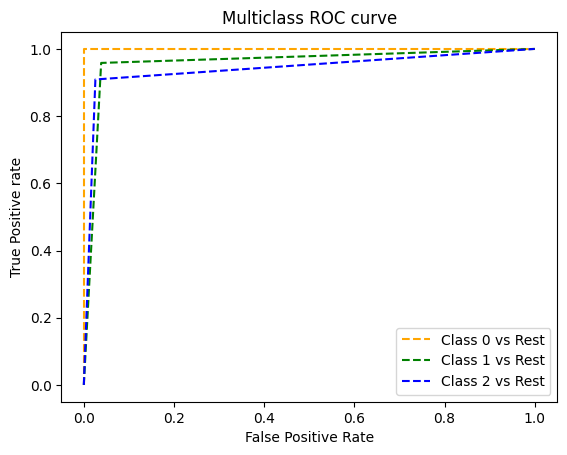

In [108]:
dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

dtc_ovr.fit(X_train, Y_train)

Y_predict = dtc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = dtc_ovr.predict_proba(X_test)


print(Y_proba_predict.shape)
print(Y_test.shape)

indexList = [np.any(i) for i in np.isnan(Y_proba_predict)]
print(len(indexList))

Y_proba_predict = np.delete(Y_proba_predict, indexList, axis=0)
Y_test = np.delete(Y_test, indexList, axis=0)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.96      0.96        24
           2       0.91      0.91      0.91        11

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

(50, 3)
(50,)
50


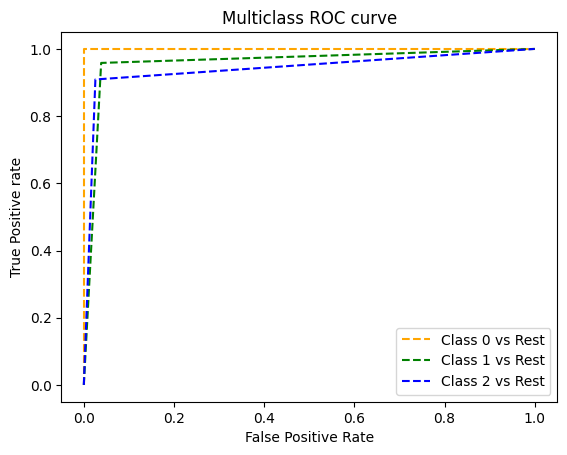

In [109]:
dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

dtc_ovr.fit(X_train, Y_train)

Y_predict = dtc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = dtc_ovr.predict_proba(X_test)


print(Y_proba_predict.shape)
print(Y_test.shape)

indexList = [np.any(i) for i in np.isnan(Y_proba_predict)]
print(len(indexList))

Y_proba_predict = np.delete(Y_proba_predict, indexList, axis=0)
Y_test = np.delete(Y_test, indexList, axis=0)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [110]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_predict = gnb.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

iris_gnb_report = classification_report(Y_test, Y_predict)

Y_proba_predict = gnb.predict_proba(X_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.96      0.96        24
           2       0.91      0.91      0.91        11

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.96      0.96        24
           2       0.91      0.91      0.91        11

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



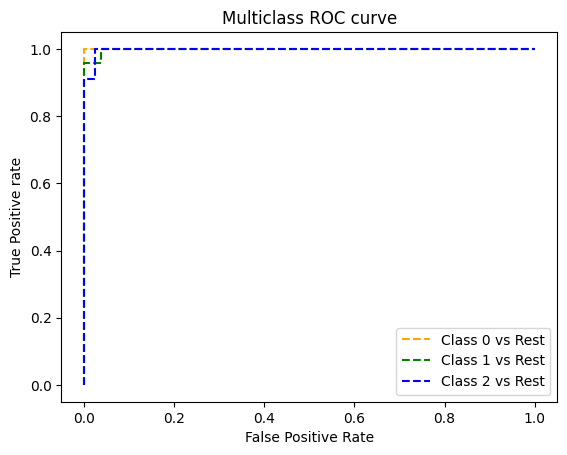

In [111]:

gnb_ovr = OneVsRestClassifier(GaussianNB())

gnb_ovr.fit(X_train, Y_train)

Y_predict = gnb_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = gnb_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(iris.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

## Wine


In [112]:
wine_lda = pd.DataFrame(data=lda_pipeline.fit_transform(wine.data, wine.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

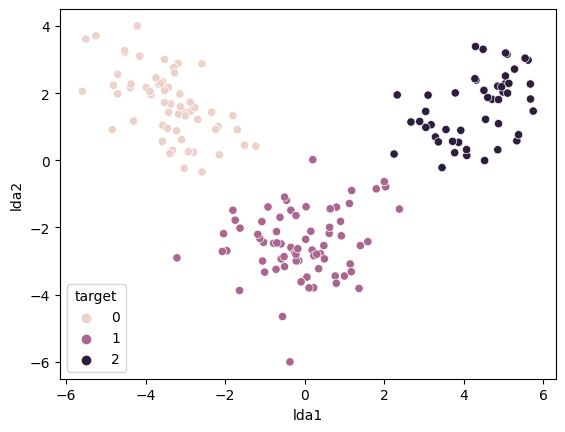

In [113]:
sns.scatterplot(data=wine_lda, x='lda1', y='lda2', hue=wine.target)

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_lda, wine.target, test_size=0.33)

In [115]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))
wine_knn_report = classification_report(Y_test, Y_predict)

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



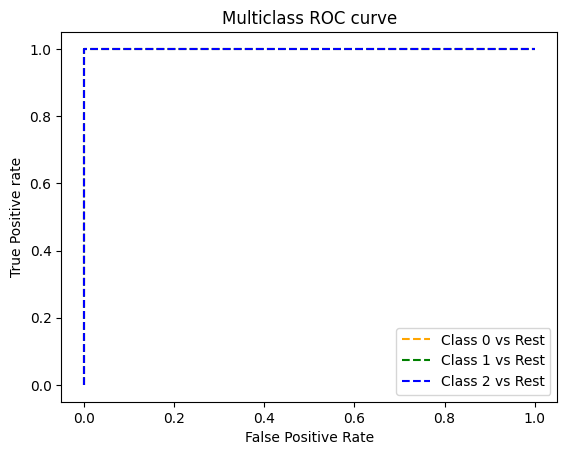

In [116]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))

knn_ovr.fit(X_train, Y_train)

Y_predict = knn_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [117]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

wine_svc_report = classification_report(Y_test, Y_predict)

Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



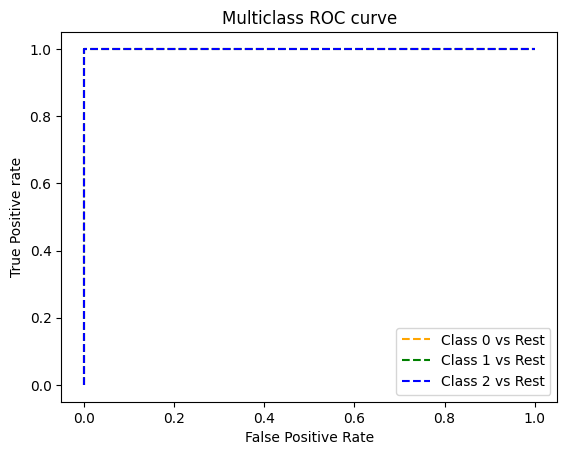

In [118]:
svc_ovr = OneVsRestClassifier(SVC(gamma='auto', probability=True))

svc_ovr.fit(X_train, Y_train)

Y_predict = svc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = svc_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [119]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))
wine_dtc_report = classification_report(Y_test, Y_predict)

Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        13

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.99        59
weighted avg       0.98      0.98      0.98        59



[0 1 2]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.96      0.98        25
           2       0.87      1.00      0.93        13

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.96        59
weighted avg       0.97      0.97      0.97        59



/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


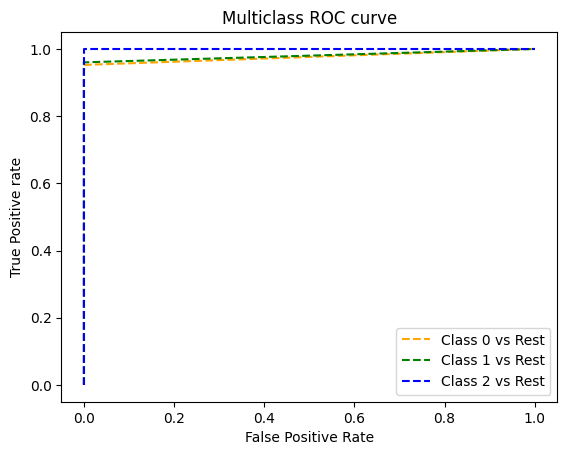

In [120]:
print(wine.target.unique())

dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

dtc_ovr.fit(X_train, Y_train)

Y_predict = dtc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = dtc_ovr.predict_proba(X_test)


# Y_proba_predict[34]=[0, 0, 0]


# print(Y_proba_predict)
# print(np.argwhere(np.isnan(Y_proba_predict)))
np.nan_to_num(Y_proba_predict, copy=False)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [121]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_predict = gnb.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

wine_gnb_report = classification_report(Y_test, Y_predict)



Y_proba_predict = gnb.predict_proba(X_test)


# ####################


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



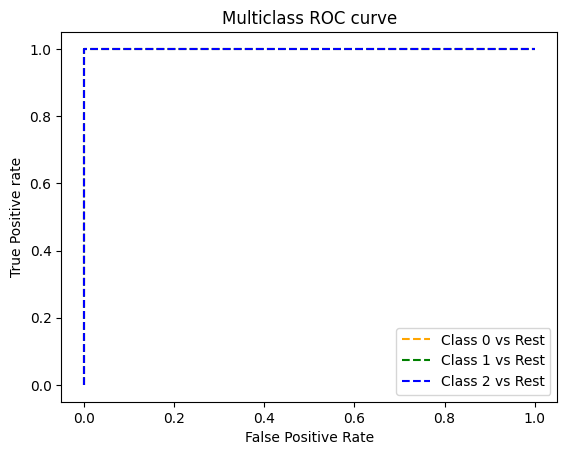

In [122]:

gnb_ovr = OneVsRestClassifier(GaussianNB())

gnb_ovr.fit(X_train, Y_train)

Y_predict = gnb_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = gnb_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(wine.target.unique())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

## Drug

<Axes: >

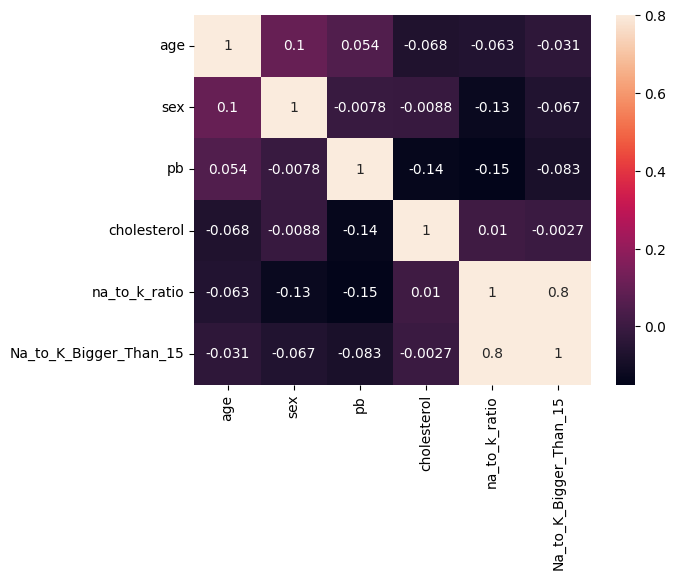

In [123]:
sns.heatmap(drug.corr(),vmax=0.8, annot= True)

In [124]:
drug.shape

(200, 6)

In [125]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

In [126]:
drug_pca = pd.DataFrame(data=pca_pipeline.fit_transform(drug, drug_target), columns=['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

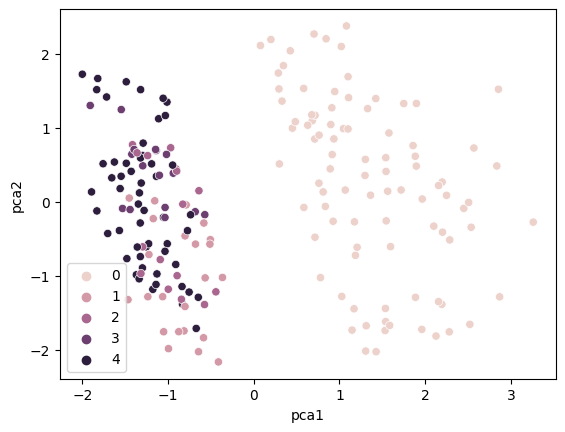

In [127]:
sns.scatterplot(data=drug_pca, x='pca1', y='pca2', hue=drug_target)

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(drug_pca, drug_target, test_size=0.33)

In [129]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

drug_knn_report = classification_report(Y_test, Y_predict)


Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.31      0.71      0.43         7
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         5
           4       0.67      0.60      0.63        20

    accuracy                           0.71        66
   macro avg       0.46      0.50      0.46        66
weighted avg       0.70      0.71      0.70        66



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.38      0.43      0.40         7
           2       0.33      0.20      0.25         5
           3       0.33      0.20      0.25         5
           4       0.65      0.75      0.70        20

    accuracy                           0.74        66
   macro avg       0.54      0.52      0.52        66
weighted avg       0.73      0.74      0.73        66



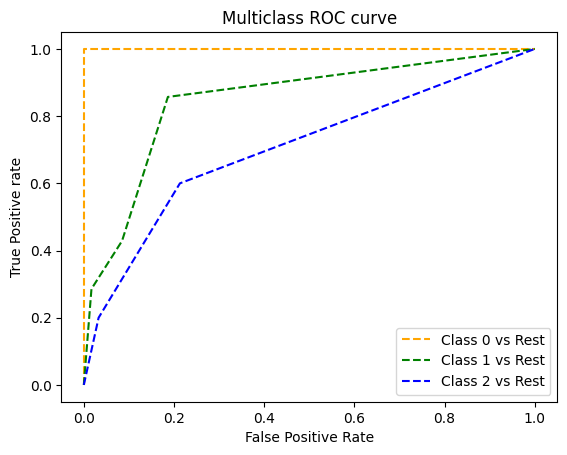

In [130]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

knn_ovr.fit(X_train, Y_train)

Y_predict = knn_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = knn_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(np.unique(drug_target))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [131]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

drug_svc_report = classification_report(Y_test, Y_predict)


Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.38      0.43      0.40         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.55      0.80      0.65        20

    accuracy                           0.73        66
   macro avg       0.39      0.45      0.41        66
weighted avg       0.65      0.73      0.68        66



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.38      0.43      0.40         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.57      0.80      0.67        20

    accuracy                           0.73        66
   macro avg       0.38      0.45      0.41        66
weighted avg       0.64      0.73      0.68        66



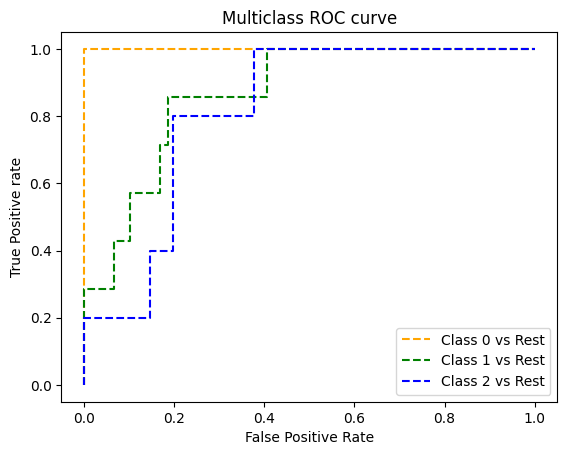

In [132]:
svc_ovr = OneVsRestClassifier(SVC(gamma='auto', probability=True))

svc_ovr.fit(X_train, Y_train)

Y_predict = svc_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = svc_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(np.unique(drug_target))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [133]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

drug_dtc_report = classification_report(Y_test, Y_predict)


Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.30      0.43      0.35         7
           2       0.14      0.20      0.17         5
           3       0.25      0.20      0.22         5
           4       0.62      0.50      0.56        20

    accuracy                           0.67        66
   macro avg       0.46      0.47      0.46        66
weighted avg       0.69      0.67      0.67        66



In [134]:
# dtc_ovr = OneVsRestClassifier(DecisionTreeClassifier())

# dtc_ovr.fit(X_train, Y_train)

# Y_predict = dtc_ovr.predict(X_test)

# conf_matrix = confusion_matrix(Y_test, Y_predict)

# # disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# # disp.plot()

# f1 = f1_score(Y_test, Y_predict, average='micro')

# print(classification_report(Y_test, Y_predict))

# Y_proba_predict = dtc_ovr.predict_proba(X_test, check_input=False)

# indexList = [np.any(i) for i in np.isnan(Y_proba_predict)]
# Y_proba_predict = np.delete(Y_proba_predict, indexList, axis=0)

# np.nan_to_num(Y_proba_predict, copy=False)

# print("Shapes")
# print(Y_test.shape)
# print(Y_proba_predict.shape)
# print()
# print(X_test.shape)

# # roc curve for classes
# fpr = {}
# tpr = {}
# thresh ={}

# n_class = len(np.unique(drug_target))

# for i in range(n_class):    
#     fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

#     # plotting    
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
# plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.42      0.71      0.53         7
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         5
           4       0.67      0.70      0.68        20

    accuracy                           0.74        66
   macro avg       0.47      0.52      0.49        66
weighted avg       0.70      0.74      0.72        66

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.42      0.71      0.53         7
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         5
           4       0.64      0.70      0.67        20

    accuracy                           0.74        66
   macro avg       0.48      0.52      0.49        66
weighted avg       0.70      0.74      0.72        66



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

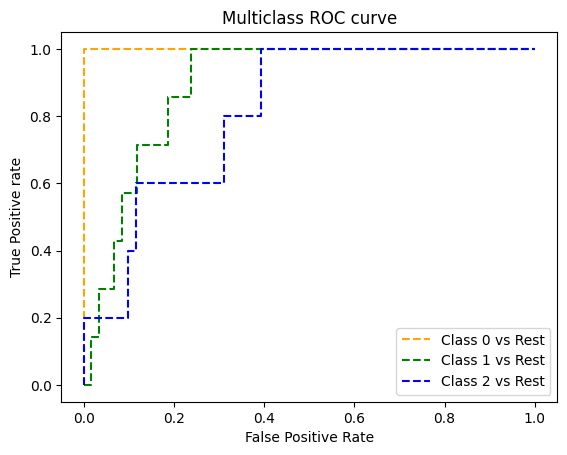

In [135]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_predict = gnb.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))

Y_proba_predict = gnb.predict_proba(X_test)


# ####################
gnb_ovr = OneVsRestClassifier(GaussianNB())

gnb_ovr.fit(X_train, Y_train)

Y_predict = gnb_ovr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

print(classification_report(Y_test, Y_predict))
drug_gnb_report = classification_report(Y_test, Y_predict)

Y_proba_predict = gnb_ovr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = len(np.unique(drug_target))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_proba_predict[:,i], pos_label=i)

    # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [136]:
print("Iris")
print(iris_knn_report)
print(iris_svc_report)
print(iris_dtc_report)
print(iris_gnb_report)
print("Wine")
print(wine_knn_report)
print(wine_svc_report)
print(wine_dtc_report)
print(wine_gnb_report)
print("Drug")
print(drug_knn_report)
print(drug_svc_report)
print(drug_dtc_report)
print(drug_gnb_report)

Iris
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        24
           2       0.85      1.00      0.92        11

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.96      0.98        24
           2       0.92      1.00      0.96        11

    accuracy                           0.98        50
   macro avg       0.97      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.96      0.96        24
           2       0.91      0.91      0.91        11

    accuracy   

# Zad 2

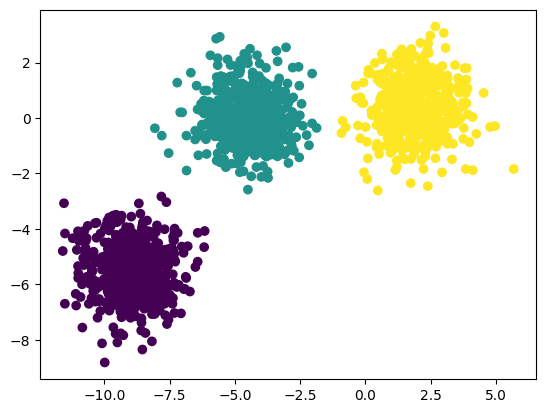

In [137]:
n_samples = 1500
random_state = 170


X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

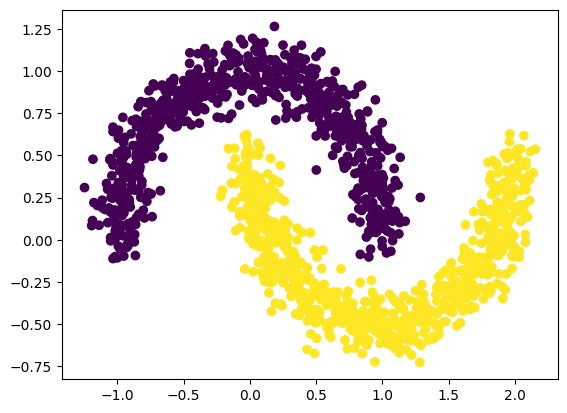

In [138]:
n_samples = 1500

X_moon, y_moon = make_moons(n_samples=n_samples, noise=0.1)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon)
plt.show()

## Blob


In [139]:
# spectral clustering


In [140]:
random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

Silhouette Coefficient for KMeans: 0.7333423486262539
Calinski-Harabasz Index for KMeans: 10633.868943793219
Rand index for KMeans: 1.0
Homogeneity for KMeans: 1.0
Mutual Information for KMeans: 1.09861228866811


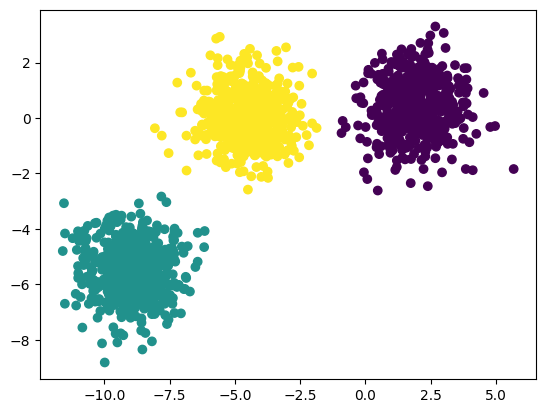

In [141]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

print(f'Silhouette Coefficient for KMeans: {silhouette_score(X, y_pred)}')
print(f'Calinski-Harabasz Index for KMeans: {calinski_harabasz_score(X, y_pred)}')
print(f'Rand index for KMeans: {rand_score(y, y_pred)}')
print(f'Homogeneity for KMeans: {homogeneity_score(y, y_pred)}')
print(f'Mutual Information for KMeans: {mutual_info_score(y, y_pred)}')

Silhouette Coefficient for MeanShift: 0.7333423486262539
Calinski-Harabasz Index for MeanShift: 10633.868943793219
Rand index for MeanShift: 1.0
Homogeneity for MeanShift: 1.0
Mutual Information for MeanShift: 1.09861228866811


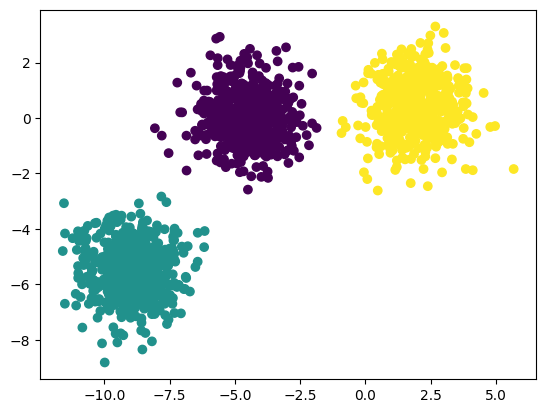

In [142]:
y_m_pred = MeanShift().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_m_pred)

print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X, y_m_pred)}')
print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X, y_m_pred)}')
print(f'Rand index for MeanShift: {rand_score(y, y_m_pred)}')
print(f'Homogeneity for MeanShift: {homogeneity_score(y, y_m_pred)}')
print(f'Mutual Information for MeanShift: {mutual_info_score(y, y_m_pred)}')

Silhouette Coefficient for MeanShift: 0.7333423486262539
Calinski-Harabasz Index for MeanShift: 10633.868943793219
Rand index for MeanShift: 1.0
Homogeneity for MeanShift: 1.0
Mutual Information for MeanShift: 1.09861228866811


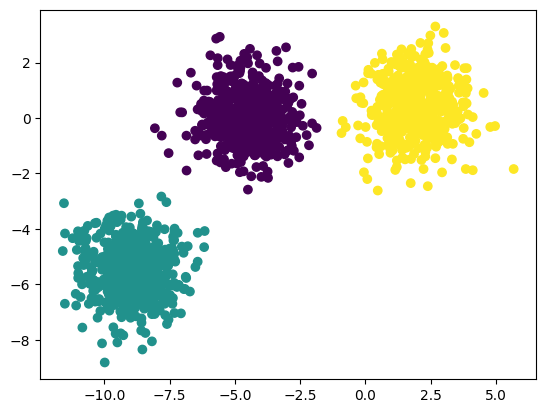

In [143]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3)

y_spec_predict = spectral.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_m_pred)

print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X, y_spec_predict)}')
print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X, y_spec_predict)}')
print(f'Rand index for MeanShift: {rand_score(y, y_spec_predict)}')
print(f'Homogeneity for MeanShift: {homogeneity_score(y, y_spec_predict)}')
print(f'Mutual Information for MeanShift: {mutual_info_score(y, y_spec_predict)}')

## Moon

In [144]:
# X_moon, y_moon

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

Silhouette Coefficient for KMeans: 0.481446122390562
Calinski-Harabasz Index for KMeans: 2161.4977033970526
Rand index for KMeans: 0.6168725817211475
Homogeneity for KMeans: 0.17628706900059238
Mutual Information for KMeans: 0.12219288484693716


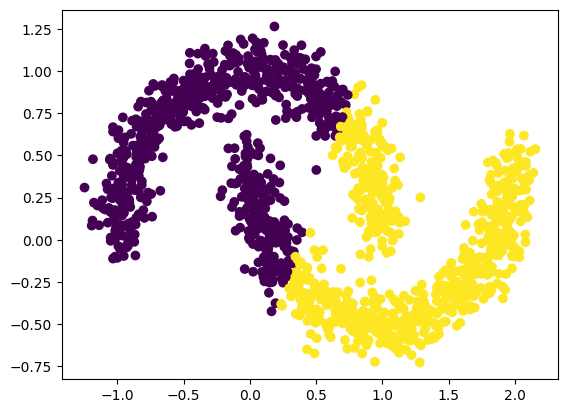

In [145]:
y_moon_pred = KMeans(n_clusters=2, **common_params).fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_pred)

print(f'Silhouette Coefficient for KMeans: {silhouette_score(X_moon, y_moon_pred)}')
print(f'Calinski-Harabasz Index for KMeans: {calinski_harabasz_score(X_moon, y_moon_pred)}')
print(f'Rand index for KMeans: {rand_score(y_moon, y_moon_pred)}')
print(f'Homogeneity for KMeans: {homogeneity_score(y_moon, y_moon_pred)}')
print(f'Mutual Information for KMeans: {mutual_info_score(y_moon, y_moon_pred)}')

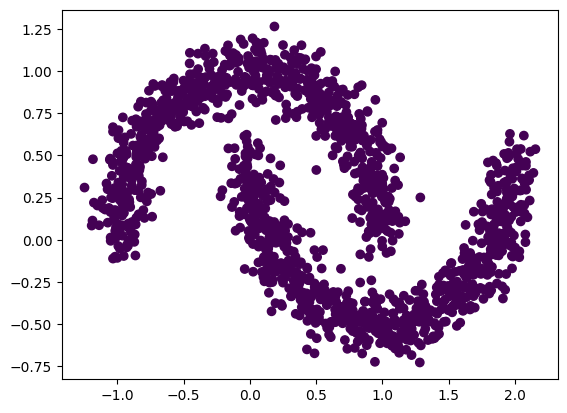

In [146]:
y_moon_m_pred = MeanShift().fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_m_pred)

# print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X_moon, y_moon_m_pred)}')
# print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X_moon, y_moon_m_pred)}')
# print(f'Rand index for MeanShift: {rand_score(y_moon_m, y_moon_m_pred)}')
# print(f'Homogeneity for MeanShift: {homogeneity_score(y_moon_m, y_moon_m_pred)}')
# print(f'Mutual Information for MeanShift: {mutual_info_score(y_moon_m, y_moon_m_pred)}')

Silhouette Coefficient for SpectralClustering: 0.48238333201822314
Calinski-Harabasz Index for SpectralClustering: 2150.0114756586618
Rand index for SpectralClustering: 0.6412728485657104
Homogeneity for SpectralClustering: 0.21508121169806302
Mutual Information for SpectralClustering: 0.14908293547992912


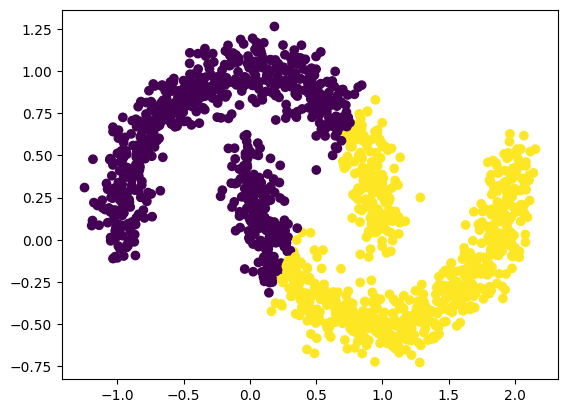

In [147]:
spectral = SpectralClustering(n_clusters=2)

y_spec_predict = spectral.fit_predict(X_moon)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_spec_predict)

print(f'Silhouette Coefficient for SpectralClustering: {silhouette_score(X_moon, y_spec_predict)}')
print(f'Calinski-Harabasz Index for SpectralClustering: {calinski_harabasz_score(X_moon, y_spec_predict)}')
print(f'Rand index for SpectralClustering: {rand_score(y_moon, y_spec_predict)}')
print(f'Homogeneity for SpectralClustering: {homogeneity_score(y_moon, y_spec_predict)}')
print(f'Mutual Information for SpectralClustering: {mutual_info_score(y_moon, y_spec_predict)}')

# Zad 3


In [148]:
!pip install -q openml
import openml
from sklearn.preprocessing import LabelEncoder

In [149]:
# diabetes = pd.read_csv('/content/dataset/diabetes.csv', delimiter=',')
diabetes_raw = openml.datasets.get_dataset(37).get_data(dataset_format="dataframe")

diabetes = diabetes_raw[0]
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


In [150]:
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [151]:
diabetes_target = diabetes['class']
diabetes.drop(["class"], inplace=True, axis=1)

In [152]:
encoder = LabelEncoder()

diabete_target = encoder.fit_transform(diabetes_target)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(diabetes, diabetes_target, test_size = 0.3, random_state=50)

In [157]:
svc = SVC()
scaler = StandardScaler()